In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [5]:

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)


x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)



In [6]:
# **Visualiseer de data**
# Toon enkele afbeeldingen met hun labels.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



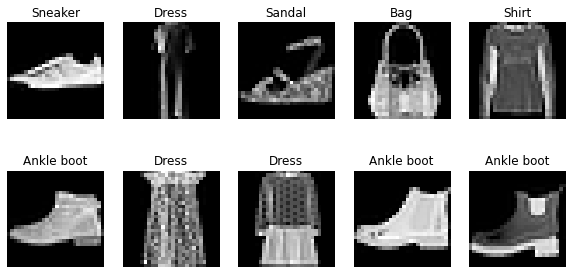

In [7]:
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

plot_sample_images(x_train, y_train, class_names)

In [8]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compileer het model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train het model.
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7718 - loss: 0.6655 - val_accuracy: 0.8512 - val_loss: 0.4255
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8585 - loss: 0.3880 - val_accuracy: 0.8639 - val_loss: 0.3824
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8731 - loss: 0.3486 - val_accuracy: 0.8709 - val_loss: 0.3580
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8834 - loss: 0.3167 - val_accuracy: 0.8742 - val_loss: 0.3468
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8871 - loss: 0.3030 - val_accuracy: 0.8813 - val_loss: 0.3332
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8971 - loss: 0.2793 - val_accuracy: 0.8799 - val_loss: 0.3382
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8986 - loss: 0.2748 - val_accuracy: 0.8825 - val_loss: 0.3160
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9031 - loss: 0.2553 - 

In [9]:
# **Voorspel met het model de testdata**
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
# **Evalueer het model**
# Bereken nauwkeurigheid op de testset.
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.3760
Test loss: 0.37375715374946594
Test accuracy: 0.8727999925613403


In [11]:
def plot_predictions(images, true_labels, predicted_labels, class_names, start_index=0, num_images=10):
    plt.figure(figsize=(15, 7))
    for i in range(num_images):
        idx = start_index + i
        plt.subplot(2, 5, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}")
        plt.axis('off')
    plt.show()

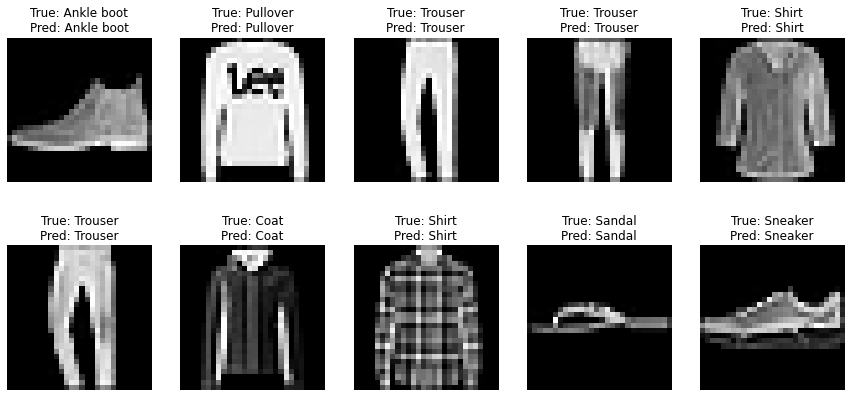

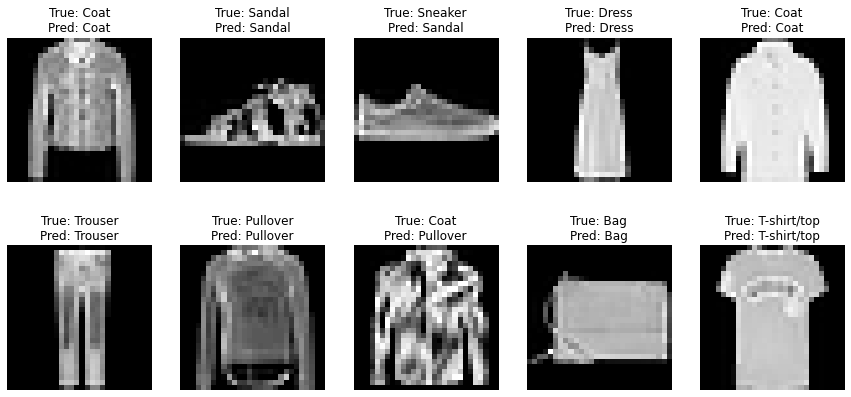

In [12]:
# Toon meer voorspellingen door de start_index en num_images te variëren.
plot_predictions(x_test, y_test_classes, predicted_classes, class_names, start_index=0, num_images=10)
plot_predictions(x_test, y_test_classes, predicted_classes, class_names, start_index=10, num_images=10)


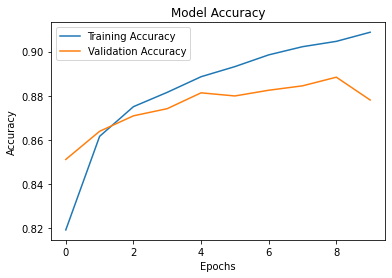

In [13]:
# **Extra: Visualiseer de trainingsgeschiedenis**
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

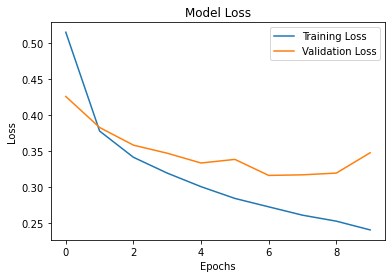

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()